Team **11** 

##Building a Quantum internet infrastructure for the FAB bank in the UAE 




For the goal of building an effiecient quantum network for the FAB bank in the UAE, located in the cities Dubai, Abu-Dhabi, Fujairah. we levearaged quantum optimization techniques to solve the repeater placement problem that respects specific effeciency requirements.

We formulated the problem as a Quadratic unconstrained binary optimization (QUBO) and solved it with the Quantum Approximate Optimization Algorithm (QAOA), and we executed our solution on IBM quantum simulators.

In [ ]:
!pip install -q qiskit

In [ ]:
!pip install -q qiskit-optimization

##importing libraries


In [ ]:
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit.algorithms import QAOA
from scipy.optimize import fsolve

In [ ]:
def rate(elementary_link_length, number_of_repeaters, number_of_modes, swap_probability):
    """Assumes dual-rail encoding and BSM success probability 50% at the midpoint station."""

    one_mode_link_prob = .5 * np.exp(- elementary_link_length / attenuation_length)
    link_prob = 1 - np.power(1 - one_mode_link_prob, number_of_modes)
    success_prob = np.power(link_prob, number_of_repeaters + 1) * np.power(swap_probability, number_of_repeaters)
    return speed_of_light_in_fiber / elementary_link_length * success_prob


def fidelity(elementary_link_fidelity, number_of_repeaters):

    depolar_prob = (4 * elementary_link_fidelity - 1) / 3
    return .25 + .75 * np.power(depolar_prob, number_of_repeaters + 1)


def solve_number_of_repeaters(elementary_link_fidelity, target_fidelity):

    def f(number_of_repeaters):
        calculated_fidelity = fidelity(elementary_link_fidelity=elementary_link_fidelity,
                                       number_of_repeaters=number_of_repeaters)
        return calculated_fidelity - target_fidelity

    number_of_repeaters = fsolve(func=f, x0=np.array(1))
    return np.floor(number_of_repeaters)


def solve_rate(number_of_repeaters, number_of_modes, swap_probability, target_rate):

    def f(elementary_link_length):
        calculated_rate = rate(elementary_link_length=elementary_link_length,
                               number_of_repeaters=number_of_repeaters,
                               swap_probability=swap_probability,
                               number_of_modes=number_of_modes)
        return calculated_rate - target_rate

    elementary_link_length = fsolve(func=f, x0=np.array(50))
    return np.floor(elementary_link_length)


def max_length_and_rate(target_fidelity, target_rate, elementary_link_fidelity, number_of_modes, swap_probability):

    [Nmax] = solve_number_of_repeaters(elementary_link_fidelity=elementary_link_fidelity,
                                       target_fidelity=target_fidelity)
    [Lmax] = solve_rate(number_of_repeaters=Nmax,
                        target_rate=target_rate,
                        number_of_modes=number_of_modes,
                        swap_probability=swap_probability)

    print("Requirements\n\ntarget_fidelity: {}\ntarget_rate: {} Hz\n\n"
          "Parameters\n\nelementary_link_fidelity: {}\nnumber_of_modes: {}\nswap_probability: {}\n\n"
          "Results\n\nLmax = {} km\nNmax = {} \n\n"
          .format(target_fidelity, target_rate, elementary_link_fidelity, number_of_modes, swap_probability,
                  Lmax, Nmax))

    return Lmax, Nmax

In [ ]:
def i2s(s, *i):
    si=''
    for j in i:
        si+=','+str(j)
    return s+si

function for Creating the Graph and adding the weights, plotting the graph

In [ ]:
def create_graph(nodes, edges) :
  # Create a new graph object
  G = nx.Graph()

  # Add nodes to the graph
  for i in range(len(nodes)):
    G.add_node(nodes[i])
  # Add edges to the graph
  for i in range(len(edges)):
      G.add_edge(edges[i][0], edges[i][1],weight=3)
  return G
   
def draw_graph(G):
    # Draw the graph
    nx.draw(G, with_labels=True)
    plt.show()

In [ ]:
def remove_edges(G, Lmax):
  G1=copy.deepcopy(G)
  for u, v, weight in list(G.edges(data='weight')):
    if weight > Lmax:
        G1.remove_edge(u, v)
  return G1

In [ ]:
target_fidelity=0.878 #80
#target_fidelity=0.84 #70

number_of_modes=107 #80
#number_of_modes=109 #70

target_entangl_rate=1

swap_probability=0.5
attenuation_length=20
link_fidelity=0.99
speed_of_light_in_fiber=2e8

L_max, Nmax = max_length_and_rate(target_fidelity, target_entangl_rate, link_fidelity, number_of_modes, swap_probability)

Requirements

target_fidelity: 0.878
target_rate: 1 Hz

Parameters

elementary_link_fidelity: 0.99
number_of_modes: 107
swap_probability: 0.5

Results

Lmax = 80.0 km
Nmax = 12.0 




Creating the Graph

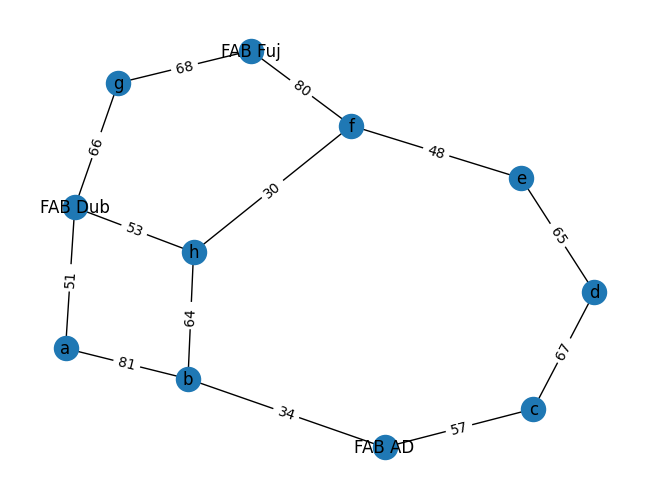

In [ ]:
# Example list of nodes
nodes = ['FAB Dub', 'FAB AD', 'FAB Fuj', 'a','b','c','d','e','f','g','h']
# Example list of edges
edges = [('FAB Dub','a'), ('a', 'b'),('b', 'FAB AD'), ('FAB AD', 'c'),('c', 'd'),('d', 'e'),('e', 'f'),('f', 'FAB Fuj'),('FAB Fuj', 'g'),('g', 'FAB Dub'),('FAB Dub', 'h'),('b', 'h'),('h','f')]
G= create_graph(nodes,edges)
G.add_weighted_edges_from([('FAB Dub','a', 51), ('a', 'b', 81),('b', 'FAB AD', 34), ('FAB AD', 'c', 57),('c', 'd', 67),('d', 'e', 65),('e', 'f', 48),('f', 'FAB Fuj', 80),('FAB Fuj', 'g', 68),('g', 'FAB Dub', 66),('FAB Dub', 'h', 53),('b', 'h', 64),('h','f', 30)])

computers=['FAB Dub', 'FAB AD', 'FAB Fuj']

pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True)

# Add edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.show()

In [ ]:
G1=remove_edges(G, L_max)

Finding all the shortest paths

In [ ]:
def find_all_shortest_paths(G, C):
  # Find nodes with degree 1
  computers=C
  
  # Find the shortest paths between pairs of degree 1 nodes
  extremal_paths = []
  for node1 in computers:
      for node2 in computers:
          if node1 < node2:
              shortest_path = nx.dijkstra_path(G, node1, node2, weight='weight')
              extremal_paths.append(shortest_path)

  # Print the extremal paths
  
  return extremal_paths

In [ ]:
middle_nodes = list(set(nodes)-set(computers))
shortest_path = find_all_shortest_paths(G1, computers)

Getting the lenght between each shortest path, implementing the constraints

In [ ]:
qp = QuadraticProgram()

yvars=[]
for u in middle_nodes:
    qp.binary_var(name=i2s('y',u))
    yvars.append(i2s('y',u))

xvars=[]
for sp in shortest_path:
   l=len(sp)
   length=0
   for u in range(l):
       for v in range(u+1,l):
         length=0
         for i in range(u,v):
           length += G.get_edge_data(sp[i],sp[i+1])['weight']
         if length <= L_max:
             if i2s('x', sp[u], sp[v]) not in xvars:
                 qp.binary_var(name=i2s('x', sp[u], sp[v]))
                 xvars.append(i2s('x', sp[u], sp[v]))

qp.minimize(linear=np.ones(len(middle_nodes)))


#CONSTRAINT 1

for sp in shortest_path:
    s, t = sp[0], sp[-1]
    l = len(sp)
    for u in range(l):
        lin_dict=dict()
        if u == 0:
            C1=1
        elif u == l-1:
            C1=-1
        else:
            C1=0
        for v in range(u+1, l):
            if i2s('x', sp[u], sp[v]) in xvars:
                lin_dict[i2s('x', sp[u], sp[v])]=1
        for w in range(u):
            if i2s('x', sp[w], sp[u]) in xvars:
                lin_dict[i2s('x', sp[w], sp[u])]=-1
        qp.linear_constraint(linear=lin_dict, sense='==', rhs=C1)
        
#CONSTRAINT 2

for sp in shortest_path:
    s, t = sp[0], sp[-1]
    l = len(sp)
    for u in range(1,l-1):
        lin_dict=dict()
        for v in range(u+1, l):
            if i2s('x', sp[u], sp[v]) in xvars:
                lin_dict[i2s('x', sp[u], sp[v])]=1
        for w in range(u):
            if i2s('x', sp[w], sp[u]) in xvars:
                lin_dict[i2s('x', sp[w], sp[u])]=1
        lin_dict[i2s('y', sp[u])]=-2
        
        qp.linear_constraint(linear=lin_dict, sense='==', rhs=0)


print(qp.prettyprint())

Problem name: 

Minimize
  y,a + y,b + y,c + y,d + y,e + y,f + y,g + y,h

Subject to
  Linear constraints (18)
    x,FAB Dub,g == 1  'c0'
    -x,FAB Dub,g + x,g,FAB Fuj == 0  'c1'
    -x,g,FAB Fuj == -1  'c2'
    x,FAB AD,b == 1  'c3'
    -x,FAB AD,b + x,b,h == 0  'c4'
    -x,b,h + x,h,FAB Dub == 0  'c5'
    -x,h,FAB Dub == -1  'c6'
    x,FAB AD,b == 1  'c7'
    -x,FAB AD,b + x,b,h == 0  'c8'
    -x,b,h + x,h,f == 0  'c9'
    x,f,FAB Fuj - x,h,f == 0  'c10'
    -x,f,FAB Fuj == -1  'c11'
    x,FAB Dub,g + x,g,FAB Fuj - 2*y,g == 0  'c12'
    x,FAB AD,b + x,b,h - 2*y,b == 0  'c13'
    x,b,h + x,h,FAB Dub - 2*y,h == 0  'c14'
    x,FAB AD,b + x,b,h - 2*y,b == 0  'c15'
    x,b,h + x,h,f - 2*y,h == 0  'c16'
    x,f,FAB Fuj + x,h,f - 2*y,f == 0  'c17'

  Binary variables (15)
    y,f y,a y,e y,d y,g y,b y,h y,c x,FAB Dub,g x,g,FAB Fuj x,FAB AD,b x,b,h
    x,h,FAB Dub x,h,f x,f,FAB Fuj



Converting the problem to QUBO

In [ ]:
qp2qubo = QuadraticProgramToQubo(penalty=10)
qubo = qp2qubo.convert(qp)

qubo_matrix = qubo.objective.quadratic.to_array()
print("QUBO matrix:\n", qubo_matrix)

QUBO matrix:
 [[ 40.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. -40.
  -40.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.  40.   0.   0.   0. -40. -40.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.  80.   0.   0.   0.   0. -80. -80.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.  80.   0.   0.   0.   0. -80. -40. -40.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.   0.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  30.   0.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  60.   0.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  80.   0.   0.
    0.]
 [  0.   0.   0.   0.   0.

In [ ]:
#algorithm_globals.random_seed = 10598
exact_mes = NumPyMinimumEigensolver()
exact = MinimumEigenOptimizer(exact_mes)
exact_result = exact.solve(qubo)
print(exact_result.prettyprint())

objective function value: 4.0
variable values: y,f=1.0, y,a=0.0, y,e=0.0, y,d=0.0, y,g=1.0, y,b=1.0, y,h=1.0, y,c=0.0, x,FAB Dub,g=1.0, x,g,FAB Fuj=1.0, x,FAB AD,b=1.0, x,b,h=1.0, x,h,FAB Dub=1.0, x,h,f=1.0, x,f,FAB Fuj=1.0
status: SUCCESS


Solve the problem using QAOA

In [ ]:
# Solve the problem using QAOA
backend = Aer.get_backend('aer_simulator')
qaoa = QAOA(quantum_instance=backend)
optimizer = MinimumEigenOptimizer(qaoa)
result = optimizer.solve(qubo)
print(result.prettyprint())

Original problem solution: [1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
path_dict={}
for sp in shortest_path:
    s, t = sp[0], sp[-1]
    path=[s]
    for i in sp:
      if i2s('y',i) in yvars and result[i2s('y',i)]==1:
        path.append(i)
    path.append(t)
    path_dict[s+','+t]=path

{'FAB Dub,FAB Fuj': ['FAB Dub', 'g', 'FAB Fuj'],
 'FAB AD,FAB Dub': ['FAB AD', 'b', 'h', 'FAB Dub'],
 'FAB AD,FAB Fuj': ['FAB AD', 'b', 'h', 'f', 'FAB Fuj']}

In [ ]:
def path_info(s,t,path_dict):
    try:
      path=path_dict[s+','+t]
    except:
      path=path_dict[t+','+s]
      aux=s
      s=t
      t=aux
    N=len(path)-2
    length=1
    for i in range(len(path)-1):
      length *= G.get_edge_data(sp[i],sp[i+1])['weight']
    elementary_link_length=length**(1/(len(path)-1))
    Rate=rate(elementary_link_length, N, number_of_modes, swap_probability)
    Fidelity=fidelity(link_fidelity, N)
    print("path between nodes {} and {} is {} and has an entanglement rate of {:.2f}Hz and a fidelity of {:.2f}".format(s,t,path,Rate,Fidelity))

In [ ]:
path_info('FAB Fuj', 'FAB Dub', path_dict)

path between nodes FAB Dub and FAB Fuj is ['FAB Dub', 'g', 'FAB Fuj'] and has an entanglement rate of 2122872.58Hz and a fidelity of 0.98


# plot solution

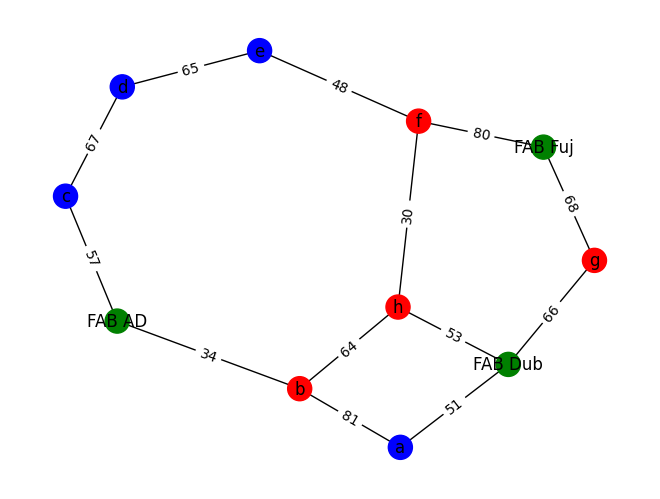

In [ ]:
node_activation = result

# Create a list of colors based on the node_activation list
colors = []
for i, node in enumerate(nodes):
    if node in computers:
        colors.append('green')
    else:
      node_color=False
      if node_activation[i2s('y',node)] == 1:
        #Since Qiskit doesn't allow us to manipulate penalties, we double-check if the solution is valid
        count=0
        for j in nodes:
          if i2s('x', node, j) in xvars:
            count+=result[i2s('x', node, j)]
          elif i2s('x', j, node) in xvars:
            count+=result[i2s('x', j, node)]
        if count>0:
            colors.append('red')
        else:
          colors.append('blue')
      else:
          colors.append('blue')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors)

# Add edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()